In [2]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0,0.5,'Magnitud')

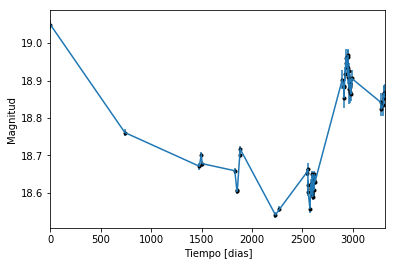

In [3]:
data = np.genfromtxt('LC_23343_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')


In [4]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [5]:
%%capture capt
sample = model.run_mcmc(20000)

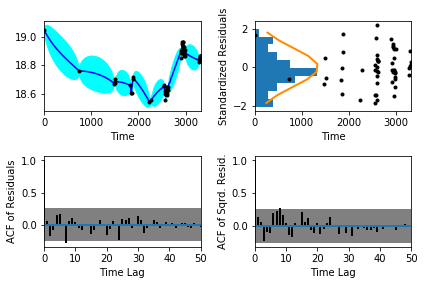

In [6]:
sample.assess_fit()

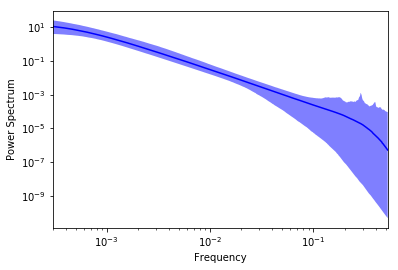

In [7]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [8]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000376389,0.0239273,'Medida del nivel de ruido')

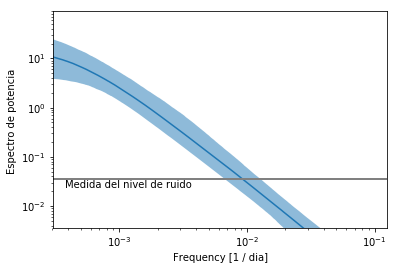

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

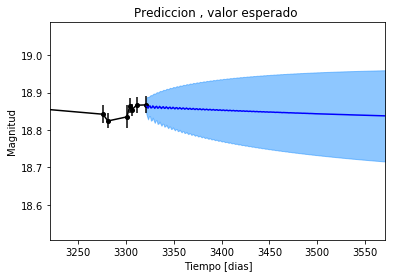

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


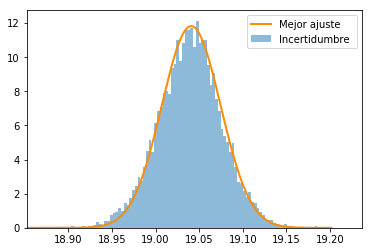

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

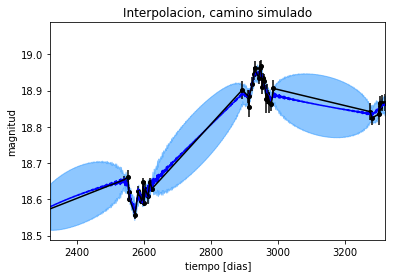

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

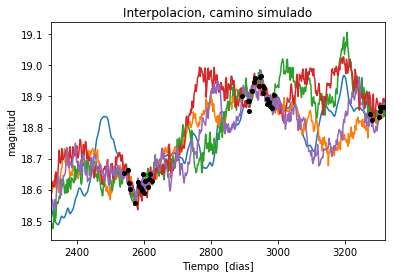

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 627.067953522
Median: 0.0313623465585
Standard deviation: 0.184470106443
68% credibility interval: [ 0.00458749  0.21101648]
95% credibility interval: [  6.09694355e-04   7.18735402e-01]
99% credibility interval: [  3.71745245e-04   9.59730675e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 419.775583609
Median: 0.0166086630651
Standard deviation: 0.110555958739
68% credibility interval: [ 0.00085886  0.0871436 ]
95% credibility interval: [  3.28038775e-04   4.00166310e-01]
99% credibility interval: [  3.04382871e-04   6.82410789e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 483.007491746
Median: 0.198886191642
St

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 658.024299417
Median: 127.449660365
Standard deviation: 2.29400917308
68% credibility interval: [ 124.79049844  129.27177868]
95% credibility interval: [ 121.76836079  130.34071888]
99% credibility interval: [ 119.36737024  130.8827524 ]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 336.355356338
Median: 2.17553904188
Standard deviation: 2.86885919463
68% credibility interval: [ 0.44960216  6.19178158]
95% credibility interval: [  0.11570084  10.46458049]
99% credibility interval: [  0.04932919  12.58813336]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 687.505269799
Median: 6.28434882073
Standard deviation: 13.0567751445
68% credibility interval: [  1.46895009  25.99629816]
95% credibility interval: [  0.1568499

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0310431
Median: 2.35129573975e-32
Standard deviation: 1.11030787043e+138
68% credibility interval: [  4.57697981e-58   2.90170520e-08]
95% credibility interval: [  1.70566625e-81   1.58993106e+02]
99% credibility interval: [  1.61255335e-87   6.76307329e+68]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 966.151272966
Median: 18.7878142836
Standard deviation: 0.0726442088933
68% credibility interval: [ 18.72188282  18.85786649]
95% credibility interval: [ 18.64772084  18.93890181]
99% credibility interval: [ 18.59396653  18.99807098]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 257.682580027
Median: 0.283083571008
Standard deviation: 0.286087319518
68% credibility interval: [ 0.          0.70415414]
95% credibility interval: [ 0.          0.96006213]
99% credibility interval: [ 0.          1.02798274]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 257.682580027
Median: 0.283083571008
Standard deviation: 0.286087319518
68% credibility interval: [ 0.          0.70415414]
95% credibility interval: [ 0.          0.96006213]
99% credibility interval: [ 0.          1.02798274]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 656.258493618
Median: 0.0
Standard deviation: 0.000207357183883
68% cred

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 658.024299417
Median: 127.449660365
Standard deviation: 2.29400917308
68% credibility interval: [ 124.79049844  129.27177868]
95% credibility interval: [ 121.76836079  130.34071888]
99% credibility interval: [ 119.36737024  130.8827524 ]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 892.693058739
Median: 0.0218306812524
Standard deviation: 0.0112987861679
68% credibility interval: [ 0.01488036  0.03223939]
95% credibility interval: [ 0.01082205  0.05011834]
99% credibility interval: [ 0.00870597  0.07602011]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 345.864983661
Median: 1.02906553582
Standard deviation: 0.233263978086
68% credibility interval: [ 0.83917552  1.2862892 ]
95% credibility interval: [ 0.69775859  1.61306319]
99% credibility interval: [ 0.61979071  1.80004504]


In [14]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 693.116544556
Median: 0.0677639922425
Standard deviation: 0.49636392671
68% credibility interval: [ 0.00861184  0.47596182]
95% credibility interval: [  7.61593474e-04   1.72237145e+00]
99% credibility interval: [  6.68803723e-05   2.84201550e+00]


In [15]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 458.494018079
Median: (-0.182212912716-5.8177077063j)
Standard deviation: 2.09453829235
68% credibility interval: [-1.03908229-0.81151205j -0.03037866-1.61134383j]
95% credibility interval: [ -4.70767021e+00-5.66002007j  -4.70411483e-03-5.29873621j]
99% credibility interval: [ -6.25001174e+00-6.55625693j  -2.26235749e-03-5.1515992j ]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 261.07479581
Median: (-0.155366511014+1.27171208737j)
Standard deviation: 1.97362103539
68% credibility interval: [-0.78599695+1.87736049j -0.02225572+2.66465179j]
95% credibility interval: [ -3.61592118e+00+5.79873558j  -2.46244003e-03+3.8485377j ]
99% credibility interval: [ -5.72400325e+00+6.18844764j  -1.97537442e-03+0.j        ]
Posterio